<a href="https://colab.research.google.com/github/Shantuuu/Python/blob/main/NLP_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tokenisation


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences=[
    'I love my dog!!',
    'I love my cat',
    'You love my dog!',
    'Do you think honry my dog is amazing?',
    'Wtf is wrong with this world!!!'
]


In [ ]:
#Used to set Limit on the Tokens fit the INstance to This case
tokenizer= Tokenizer(num_words=100,oov_token="OOV")
tokenizer.fit_on_texts(sentences)

#Use to Create Index for the Each Token
word_index=tokenizer.word_index
print(word_index)

{'OOV': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'is': 7, 'horny': 8, 'cat': 9, 'do': 10, 'think': 11, 'honry': 12, 'amazing': 13, 'wtf': 14, 'wrong': 15, 'with': 16, 'this': 17, 'world': 18}


## Seqeuncing and Fine Tuning

In [ ]:
#Create a sequences of the Tokens according to the case
sequences= tokenizer.texts_to_sequences(sentences)
print(sequences)

[[5, 3, 2, 8, 4], [5, 3, 2, 9], [6, 3, 2, 4], [10, 6, 11, 12, 2, 4, 7, 13], [14, 7, 15, 16, 17, 18]]


In [ ]:
test_data=[
    'I really love my Golden Retriver dog',
    'My dog loves my manatee'
]


test_seq= tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[5, 1, 3, 2, 1, 1, 4], [2, 4, 1, 2, 1]]


## Pad Sequences

In [ ]:
padded_seq=tf.keras.preprocessing.sequence.pad_sequences(sequences, padding="post", maxlen=6,truncating="post")
print(padded_seq)

[[ 5  3  2  8  4  0]
 [ 5  3  2  9  0  0]
 [ 6  3  2  4  0  0]
 [10  6 11 12  2  4]
 [14  7 15 16 17 18]]


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2024-08-06 14:26:18--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2024-08-06 14:26:18 (234 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

    sentences=[]
    labels=[]

    for item in datastore:
        sentences.append(item['headline'])
        labels.append(item['is_sarcastic'])

In [ ]:
vocab_size = 10000
embedding_dim = 12
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 119s - 190ms/step - accuracy: 0.7990 - loss: 0.4099 - val_accuracy: 0.8593 - val_loss: 0.3293
Epoch 2/30
625/625 - 109s - 174ms/step - accuracy: 0.9097 - loss: 0.2241 - val_accuracy: 0.8591 - val_loss: 0.3459
Epoch 3/30
625/625 - 108s - 174ms/step - accuracy: 0.9410 - loss: 0.1550 - val_accuracy: 0.8460 - val_loss: 0.4054
Epoch 4/30
625/625 - 149s - 238ms/step - accuracy: 0.9628 - loss: 0.1017 - val_accuracy: 0.8480 - val_loss: 0.4588
Epoch 5/30
625/625 - 135s - 216ms/step - accuracy: 0.9775 - loss: 0.0667 - val_accuracy: 0.8441 - val_loss: 0.5272
Epoch 6/30
625/625 - 146s - 233ms/step - accuracy: 0.9858 - loss: 0.0413 - val_accuracy: 0.8416 - val_loss: 0.6320
Epoch 7/30
625/625 - 109s - 174ms/step - accuracy: 0.9908 - loss: 0.0274 - val_accuracy: 0.8377 - val_loss: 0.7073
Epoch 8/30
625/625 - 142s - 228ms/step - accuracy: 0.9930 - loss: 0.0202 - val_accuracy: 0.8378 - val_loss: 0.7489
Epoch 9/30
625/625 - 143s - 228ms/step - accuracy: 0.9952 - loss: 0.0157 - val_a

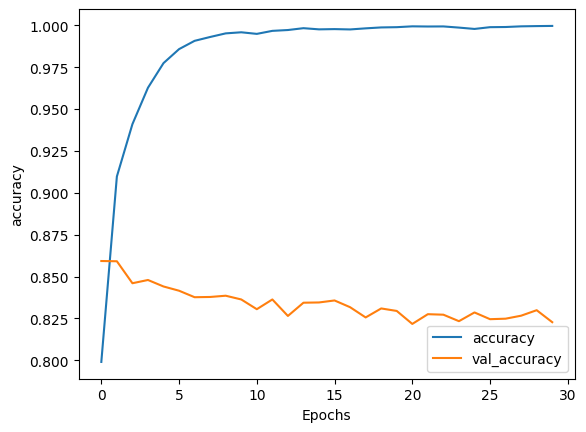

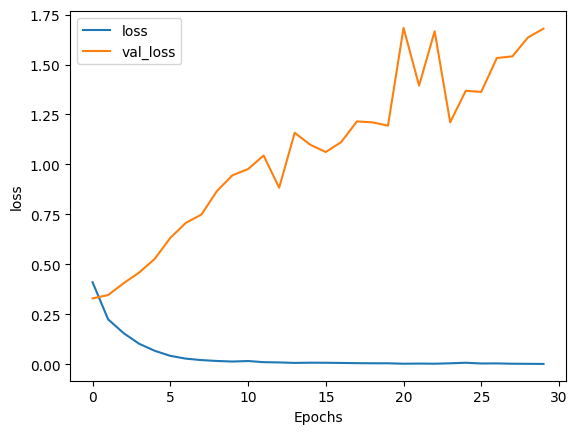

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")